In [1]:
import os
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial
from scipy.stats import circstd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-04-06 00:40:29,851 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
def plot_data(title, area, orientation, eccentricity, compactness):
    fig, axes = plt.subplots(ncols=4, figsize=(14, 3))

    axes[0].boxplot(area)
    axes[0].set_ylabel('area (pixels$^2$)')
    axes[0].set_ylim(0, 20000)
    axes[0].set_yticks(np.linspace(0, 20000, 5))

    axes[1].boxplot(orientation)
    axes[1].set_ylabel('orientation (deg)')
    axes[1].set_ylim(-90, 90)
    axes[1].set_yticks(np.linspace(-90, 90, 5))

    axes[2].boxplot(eccentricity)
    axes[2].set_ylabel('eccentricity')
    axes[2].set_ylim(0, 1)
    axes[2].set_yticks(np.linspace(0, 1, 5))

    axes[3].boxplot(compactness)
    axes[3].set_ylabel('compactness')
    axes[3].set_ylim(0, 800)
    axes[3].set_yticks(np.linspace(0, 800, 5))

    for ax in axes:
        ax.set_xticklabels(subjects, rotation=45)

    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('%s.eps' % title)
    print('Saved as %s.eps' % title)

In [3]:
subjects = ['TB', '12-005', '51-009', '52-001']
amplitude = 2
frequency = 20
datafolder = os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape')

# Roundish

In [4]:
area = []
orientation = []
eccentricity = []
compactness = []
n_drawings = []
for subject in subjects:
    X, y = p2pspatial.load_data(datafolder, subject=subject, electrodes=None, date=None,
                                amplitude=amplitude, frequency=frequency, n_jobs=-1)
    idx_round = y['eccentricity'] < np.sqrt(0.5)
    y = y.drop(columns='image').loc[idx_round, :]
    n_drawings.append(len(y))
    area.append(y['area'])
    orientation.append(np.rad2deg(y['orientation']))
    eccentricity.append(y['eccentricity'])
    compactness.append(y['compactness'])

[2, 25, 0, 31]

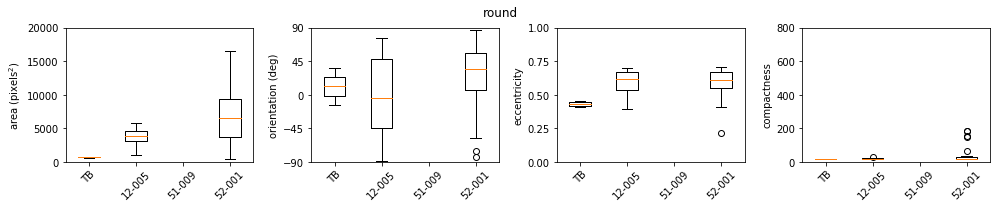

In [5]:
plot_data('round', area, orientation, eccentricity, compactness)
n_drawings

# Elongated

In [6]:
area = []
orientation = []
eccentricity = []
compactness = []
n_drawings = []
for subject in subjects:
    X, y = p2pspatial.load_data(datafolder, subject=subject, electrodes=None, date=None,
                                amplitude=amplitude, frequency=frequency, n_jobs=-1)
    idx_elong = y['eccentricity'] >= np.sqrt(0.5)
    y = y.drop(columns='image').loc[idx_elong, :]
    n_drawings.append(len(y))
    area.append(y['area'])
    orientation.append(np.rad2deg(y['orientation']))
    eccentricity.append(y['eccentricity'])
    compactness.append(y['compactness'])

[58, 85, 90, 109]

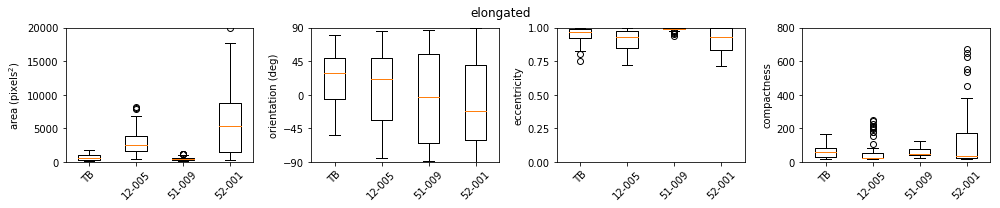

In [7]:
plot_data('elongated', area, orientation, eccentricity, compactness)
n_drawings